# Analyzing Bitcoin with Number of Tweets

## Do Tweets Affect the Price of Bitcoin?

In this analysis, we try to see if there is a connection of bitcoin prices by the number of times bitcoin is tweeted about and if the number of tweets can be a good predictor for bitcoin prices. We peform an  EDA and attempt to model a relationship with a Simple Linear Regression. We choose a linear regression because the purpose of this analysis is only exploratory. If there is a relationship, then we want to interpret it, the goal is not to acurately predict the price of bitcoin here.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import quandl
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

To get the bitcoin data, we access quandl's API. Quandl is a platform that features lots of stock data for public access.

In [2]:
# Get stock prices. Turns into a Pandas DataFrame automatically using the .get() method.
btc = quandl.get('BCHARTS/BITSTAMPUSD')

In [3]:
# Reset Index.
btc = btc.reset_index()

# EDA

Here we take a detailed look at the bitcoin closing price variable and the number of bitcoin tweets. We want to learn what we can from the variables.

## Bitcoin

In [4]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               3477 non-null   datetime64[ns]
 1   Open               3477 non-null   float64       
 2   High               3477 non-null   float64       
 3   Low                3477 non-null   float64       
 4   Close              3477 non-null   float64       
 5   Volume (BTC)       3477 non-null   float64       
 6   Volume (Currency)  3477 non-null   float64       
 7   Weighted Price     3477 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 217.4 KB


There are 3477 rows and 8 columns in this data set. Really, we are only interested in the "Close" column because that is the ending price of bitcoin for that day.

In [5]:
btc.describe()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
count,3477.000000,3477.000000,3477.000000,3477.000000,3477.000000,3.477000e+03,3477.000000
mean,4353.967279,4491.940124,4202.279336,4366.876865,9647.691574,4.194096e+07,4351.693514
std,7891.109793,8178.282280,7576.621783,7929.120496,10059.208978,8.551912e+07,7894.649211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,232.400000,236.520000,228.000000,232.870000,3656.375314,1.504641e+06,232.884930
50%,650.490000,665.000000,630.450000,651.970000,7084.239871,6.801861e+06,647.065850
75%,7015.780000,7244.690000,6774.480000,7024.190000,12331.663001,4.803795e+07,7020.372895
max,61177.030000,61781.830000,58959.570000,61165.190000,137070.178338,1.369434e+09,60429.059780


Nothing out of the ordinary here. We have a mean of closing prices at 4366.88. The current prices of bitcoin are way higher than that right now. 

Lets make a graph showing the overall price of bitcoin over the years.

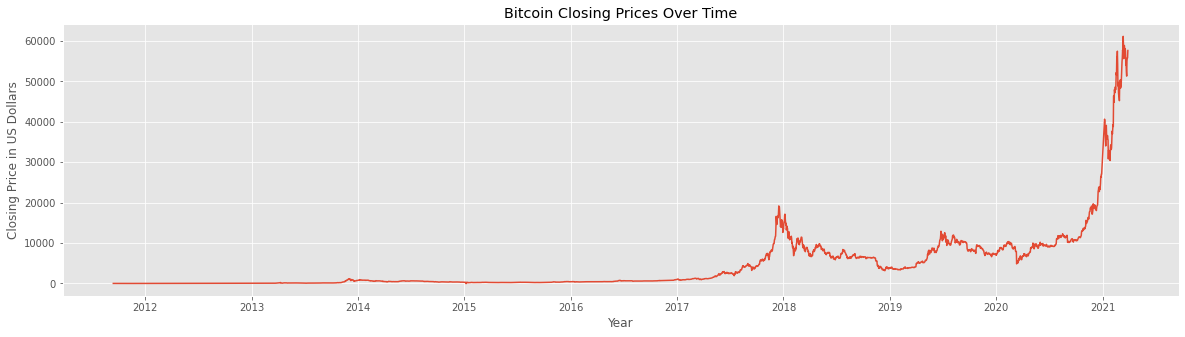

In [6]:
# Adjust plot size.
plt.figure(figsize=(20,5))

# Use seaborn to make line plot.
sns.lineplot(data=btc,x='Date',y='Close')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price in US Dollars');

We see that bitcoin had a pretty flat rate until the end of 2017, it spiked to almost 20,000 then immediately crashed in 2018, then at the end of 2020 and into 2021, bitcoin has risen to unprecendented levels. 3 times higher than it's previous highest peak in 2017.

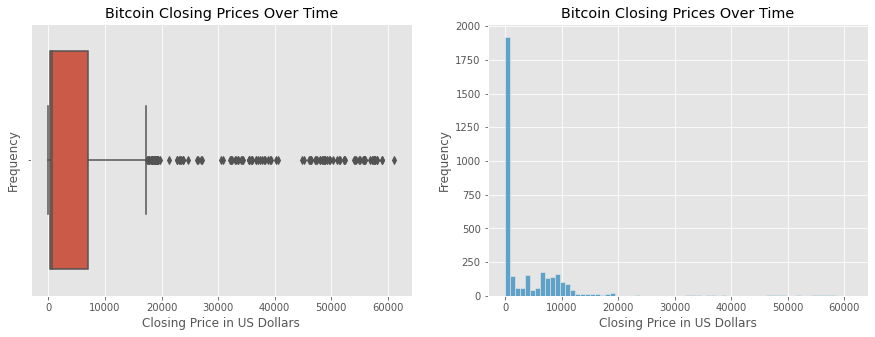

In [7]:
# Adjust plot size
plt.figure(figsize=(15,5))

# Make 2 plots. A box plot, and histogram on the same figure with subplots.
plt.subplot(121)
sns.boxplot(data = btc, x='Close')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Closing Price in US Dollars')
plt.ylabel('Frequency');

plt.subplot(122)
sns.histplot(data = btc, x='Close')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Closing Price in US Dollars')
plt.ylabel('Frequency');

It looks like most of the values lay around 10,000. In the histogram we see that most of the bitcoin prices were closer to 0. This shows that for the last 9 years, bitcoin has remained low for most of that time. 

## Tweets

The amount of bitcoin tweets per day was gathered from bitinfocharts. It is the amount of tweets per day that included #Bitcoin in it.

In [8]:
tweet_df = pd.read_csv('tweet_data.csv')
tweet_df.head()

,Date,Tweets
0,2014-04-09,8193.0
1,2014-04-10,15039.0
2,2014-04-11,14907.0
3,2014-04-12,7582.0
4,2014-04-13,10674.0


In [9]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2535 non-null   object 
 1   Tweets  2479 non-null   float64
dtypes: float64(1), object(1)
memory usage: 29.8+ KB


In this data set, there are 2535 rows and 2 columns.

In [10]:
tweet_df.describe()

,Tweets
count,2479.000000
mean,33718.683743
std,21546.377263
min,7300.000000
25%,20812.500000
50%,26690.000000
75%,36992.000000
max,212923.000000


The mean amount of bitcoin tweets is 33,718 per day overall.

Lets graph this variable to get a closer look!

In [11]:
# Switch Date column to datetime data type.
tweet_df['Date'] = tweet_df['Date'].astype('datetime64')

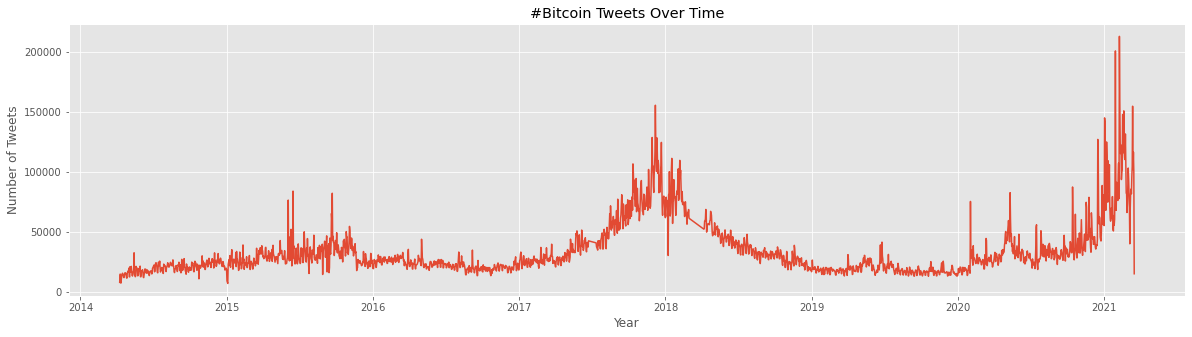

In [12]:
# Adjust plot size
plt.figure(figsize=(20,5))

# Use seaborn to make line plot.
sns.lineplot(data=tweet_df,x='Date',y='Tweets');
plt.title('#Bitcoin Tweets Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tweets');

We see that tweets had a big spike at the end of 2017, around the same time as bitcoin's spike. 2021 has seen the highest amount of tweets than never before. 

Lets look at this further.

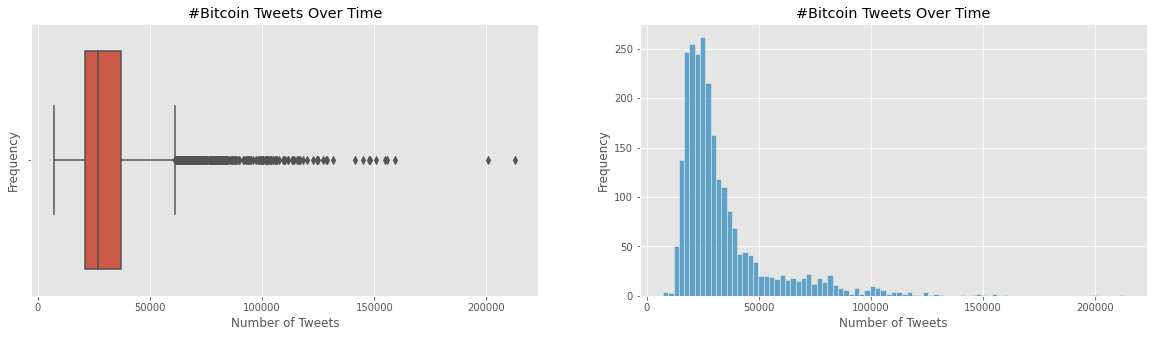

In [13]:
# Adjust plot size
plt.figure(figsize=(20,5))

# Make 2 plots. A box plot, and histogram on the same figure with subplots.
plt.subplot(121)
sns.boxplot(data = tweet_df, x='Tweets')
plt.title('#Bitcoin Tweets Over Time')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')

plt.subplot(122)
sns.histplot(data = tweet_df, x='Tweets');
plt.title('#Bitcoin Tweets Over Time')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency');

In these plots, most bitcoin tweets have mostly stayed within 10,000 to 40,000 range, much lower than the amount of tweets per day happening recently.

Next, we are going to compare these two together.

## Comparing Bitcoin Price and Tweets Together

To compare both variables together, first we need to merge them together on all the dates they match with. This starts the data set at 2014-04-09 and ends at 2021-03-17. Further, we need to drop the columns that have missing values for tweets. 

In [14]:
# Use Pandas merge to add btc date and closing price columns to the tweets dataframe.
btc_tweet_df = tweet_df.merge(btc[['Date','Close']], on = 'Date')

btc_tweet_df

,Date,Tweets,Close
0,2014-04-09,8193.0,441.69
1,2014-04-10,15039.0,363.12
2,2014-04-11,14907.0,423.00
3,2014-04-12,7582.0,423.42
4,2014-04-13,10674.0,416.30
...,...,...,...
2521,2021-03-13,154790.0,61165.19
2522,2021-03-14,102059.0,59016.39
2523,2021-03-15,116563.0,55644.37
2524,2021-03-16,99951.0,56908.34


In [15]:
btc_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2525
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2526 non-null   datetime64[ns]
 1   Tweets  2470 non-null   float64       
 2   Close   2526 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 78.9 KB


We have 2526 rows total and 3 columns.

Looks like we have same missing variables in the tweets column.

In [16]:
btc_tweet_df[btc_tweet_df['Tweets'].isnull()]

,Date,Tweets,Close
269,2015-01-03,NaN,282.00
1172,2017-06-24,NaN,2557.66
1173,2017-06-25,NaN,2502.03
1174,2017-06-26,NaN,2421.22
1175,2017-06-27,NaN,2565.00
1176,2017-06-28,NaN,2559.90
1177,2017-06-29,NaN,2541.59
1178,2017-06-30,NaN,2465.49
1179,2017-07-01,NaN,2412.41
1180,2017-07-02,NaN,2504.37


In this case, we are going to drop the rows of these missing  because there are no insights to gain from them and they will hinder the analysis that depends on looking at the relationship only with tweets and prices. 

In [17]:
# Drop Missing values.
btc_tweet_df.dropna(inplace=True)

Now we will apply a minmax scaler because the variables measure vastly different things. We choose a min max scaler because *spoiler alert* later we will transform the data using square roots. Using something like a z score scaler would make negative numbers, which in turn, would make missing values after trying to transform them.

In [18]:
# Create variable for scikit learn's minmax scaler.
scaler = MinMaxScaler()

# standardize the data with the minmax scaler.
btc_tweet_df[['tweets_scaled', 'close_scaled']] = scaler.fit_transform(btc_tweet_df[['Tweets','Close']])

In [19]:
btc_tweet_df

,Date,Tweets,Close,tweets_scaled,close_scaled
0,2014-04-09,8193.0,441.69,0.004343,0.007221
1,2014-04-10,15039.0,363.12,0.037637,0.005937
2,2014-04-11,14907.0,423.00,0.036995,0.006916
3,2014-04-12,7582.0,423.42,0.001371,0.006923
4,2014-04-13,10674.0,416.30,0.016409,0.006806
...,...,...,...,...,...
2521,2021-03-13,154790.0,61165.19,0.717284,1.000000
2522,2021-03-14,102059.0,59016.39,0.460839,0.964869
2523,2021-03-15,116563.0,55644.37,0.531375,0.909739
2524,2021-03-16,99951.0,56908.34,0.450587,0.930404


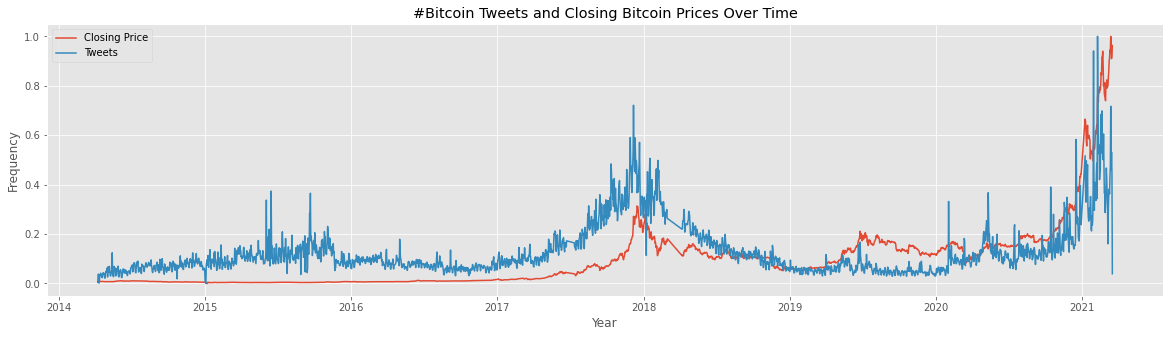

In [20]:
# Adjust plot size
plt.figure(figsize=(20,5))

# Use seaborn to make line plots.
sns.lineplot(data = btc_tweet_df,x = 'Date',y = 'close_scaled')
sns.lineplot(data = btc_tweet_df,x = 'Date',y = 'tweets_scaled');

# Make graph labels.
plt.title('#Bitcoin Tweets and Closing Bitcoin Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend(["Closing Price", "Tweets"]);

It looks like they follow similar patterns. We see increasing prices, and tweets during the 2017 bitcoin bubble, then they both go down. form 2019 to 2020 the price becomes higher than the tweets, seeing a slight different only during this time. Then, in the end of 2020 to 2021 we are seeing unprecedented spikes in both the price of bitcoin and tweets about bitcoin.

Lets look at this further!

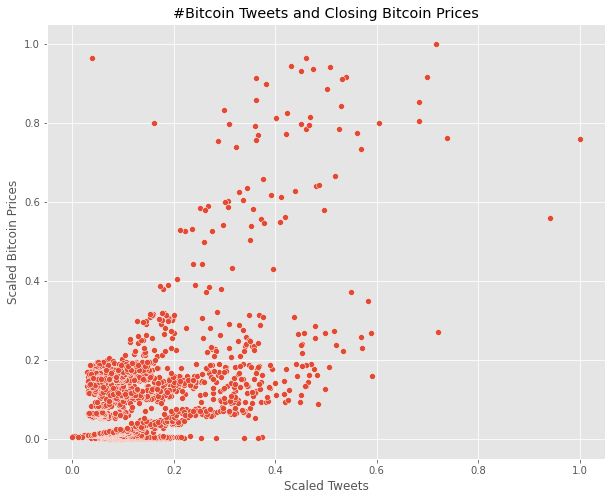

In [21]:
# Adjust plot size
plt.figure(figsize=(10,8))

# Use seaborn to make scatter plot.
sns.scatterplot(data= btc_tweet_df, x = 'tweets_scaled', y = 'close_scaled')

plt.title('#Bitcoin Tweets and Closing Bitcoin Prices')
plt.xlabel('Scaled Tweets')
plt.ylabel('Scaled Bitcoin Prices');

This shows that there is quite a lot of noise in the data. It is not very linear, although it could defintely be said that there is a pattern going on here. as tweets increase, so does the price.

We are going to try and transform it, to make it more linear.

After trial and error we decide that squaring the variables gives the best results visually.

In [22]:
# Getting the square root of the tweets column and closing prices of bitcoin.
btc_tweet_df['sqrt_tweets'] = np.sqrt(btc_tweet_df['tweets_scaled'])
btc_tweet_df['sqrt_close'] = np.sqrt(btc_tweet_df['close_scaled'])

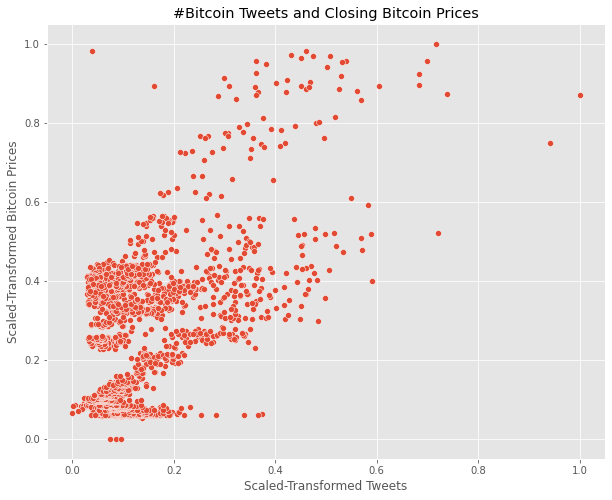

In [23]:
# Adjust plot size
plt.figure(figsize=(10,8))

# Use seaborn to make scatter plot.
sns.scatterplot(data = btc_tweet_df, x = 'tweets_scaled', y = 'sqrt_close')

plt.title('#Bitcoin Tweets and Closing Bitcoin Prices')
plt.xlabel('Scaled-Transformed Tweets')
plt.ylabel('Scaled-Transformed Bitcoin Prices');

It is a little better. there is just  a little bit more linearity here so we are going to work with this.

next we see if there is a statistical correlation.

We use Pearson R to calculate it.

In [24]:
btc_tweet_df[['close_scaled', 'tweets_scaled']].corr()

,close_scaled,tweets_scaled
close_scaled,1.00000,0.60168
tweets_scaled,0.60168,1.00000


Despite all the noise in the graph, there is a .60 correlation. This means there is a moderately relationship between closing price and bitcoin prices. 

Next we put this in a Regression Analysis.

# Regression Analysis

In [25]:
# Create a column for the intercept.
btc_tweet_df['intercept'] = 1

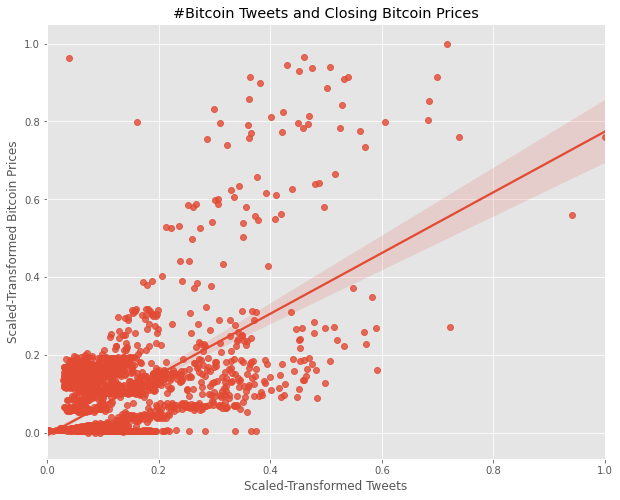

In [26]:
# Adjust plot size
plt.figure(figsize=(10,8))

# Use seaborn to make regression plot.
sns.regplot(data = btc_tweet_df, x = 'tweets_scaled', y = 'close_scaled');

plt.title('#Bitcoin Tweets and Closing Bitcoin Prices')
plt.xlabel('Scaled-Transformed Tweets')
plt.ylabel('Scaled-Transformed Bitcoin Prices');

Before performing the linear regression, we create a regression graph real quick to visualize the data. 
We see here that many points lie very far away from the regression lie. This means there will probably be some problems with the regression because ideally, we would want mose of the points to align with the line.

Lets try it anyway!

In [27]:
# Create Simple Linear Regression instance
lm = sm.OLS(btc_tweet_df['close_scaled'], btc_tweet_df[['intercept', 'tweets_scaled']])

# Fit the model.
results = lm.fit()

# Print the results.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           close_scaled   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1400.
Date:                Mon, 29 Mar 2021   Prob (F-statistic):          3.62e-243
Time:                        18:53:47   Log-Likelihood:                 2020.6
No. Observations:                2470   AIC:                            -4037.
Df Residuals:                    2468   BIC:                            -4025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -0.0067      0.003     -1.957      0.050      -0.013    1.25e-05
tweets_scaled     0.7810      0.021     37.423      0.000       0.740       0.822
==============================================================================
Omnibus:                     1184.076   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10351.336
Skew:                           2.073   Prob(JB):                         0.00
Kurtosis:                      12.132   Cond. No.                         9.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get an R-Squared value of .362 which means that approximately 36% of the variablity in bitcoin prices can be explained by the amount of bitcoin tweets if all the linear regression assumptions were to hold true.

The next step is to test those assumptions.

## Checking Assumptions

 Simple Linear Regression holds four assumptions of the data, It is important to make sure that these assumptions are not violated. They are:
 

- Zero Mean: The error term is is a random variable wich should have a mean value of 0.

- Homoscedasticity: The variance of error should be constant, regardless of the value of X.

- Independence: The error values should be independent.

- Normality: The error term is a normally distributed random variable.

We are going to exlore all of these to check if they hold true.

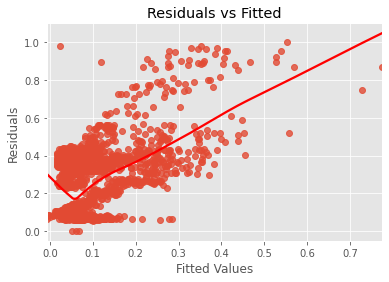

In [28]:
# Create plot to show residuals vs fitted values.
sns.regplot(x=results.predict(), y = btc_tweet_df['sqrt_close'], lowess=True, line_kws={'color': 'red'})

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals');

This is a tough call, I would say this probably violates the Homoscedasticity assumption because of the funneling pattern, as well as the Zero Mean assumption because it also has a diagonal pattern. Considering the lack of linearity of the data and these assumptions, I would say that this model is not appropriate for this data.

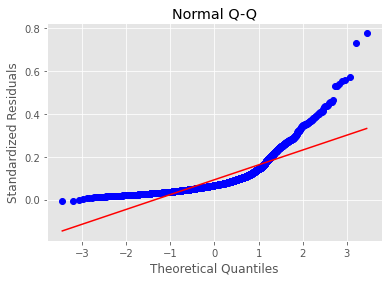

In [29]:
# Create Normal Q-Q plot.
scipy.stats.probplot(results.predict(), dist="norm", plot=plt)

plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals');

We can also see here that the QQ plot shows most of the points not being on the line. This means that the error term assumption is probably violated as well.

# Conclusion

There defintely is good reason to believe that tweets can be a predictor of bitcoin prices. They have mostly been following similar patters over time since 2014. They also have a statsicaly moderate pearson R coorelation of .60. They do however, lack strong linearity.

Even though the price of bitcoin and number of bitcoin tweets have a moderate correlation, we were unable to create a simple linear regression model with all the assumptions intact. It still stands to say that because the two variables are correlated, tweets may still be a good predictor of bitcoin prices with a different model. That is however, beyond the scope of this exploratory analysis.

## Next Steps

The next steps would be to find a better model to use to predict bitcoin using tweets.

It may be more successful if tweets were used as a predictor with multiple predictors in a more robust machine learning model.